### Import some modules

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Define myCallbacks class
After every epoch we can check the accuracy from the logs and stop the model if the desired accuracy is reached. Similar to on_epoch_end there is on_batch_end.

In [2]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('acc') > 0.98):
            print('\nAchieved an accuracy of 98%')
            self.model.stop_training = True
        
# Create an instance of myCallbacks()
callbacks = myCallbacks()            

### Try 1
Building a simple neurel network with a single hidden layer with 512 neurons

In [6]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (128, 128, 3)),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               25166336  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 25,166,849
Trainable params: 25,166,849
Non-trainable params: 0
_________________________________________________________________


### ImageDataGenerator
Keras provides a generator which can label the images automatically based on the directory name. This saves a lot of time by avoiding manually labelling the data and also does not require us to load the entire image set into the file system. 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize the image
train_generator = ImageDataGenerator(rescale = 1/255)

# Creating a generator for training data. Target_size resizes every image into the specified size.
train_data = train_generator.flow_from_directory(
                '/home/srikar/dataset/training_set/',
                target_size = (128,128),
                batch_size = 32,
                class_mode = 'binary')

test_genrator = ImageDataGenerator(rescale = 1/255)
# Creating a generator for training data.
test_data = test_genrator.flow_from_directory(
                '/home/srikar/dataset/test_set/',
                target_size = (128,128),
                batch_size = 32,
                class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Fit the model
Instead of traditional model.fit(), we need to use model.fit_generator as we are using ImageDataGenerator.
Specify callbacks to stop training once it reaches the desired accuracy

Even if steps_per_epoch are not specified, keras automatically takes the steps based on batch_size which was defined earlier.

We can take the model into a variable whoch can later be used to access the model parameters.

In [8]:
history = model.fit_generator(
            train_data,
            steps_per_epoch = 250,
            epochs = 50,
            verbose = 1,
            validation_data = test_data,
            validation_steps=63,
            callbacks = [callbacks])

Epoch 1/50
250/250 [==============================] - 111s 445ms/step - loss: 3.5809 - acc: 0.5254 - val_loss: 0.8961 - val_acc: 0.5665
Epoch 2/50
250/250 [==============================] - 109s 437ms/step - loss: 1.8350 - acc: 0.5372 - val_loss: 1.1874 - val_acc: 0.5460
Epoch 3/50
250/250 [==============================] - 112s 447ms/step - loss: 0.8476 - acc: 0.5822 - val_loss: 0.7742 - val_acc: 0.5900
Epoch 4/50
250/250 [==============================] - 109s 436ms/step - loss: 0.7737 - acc: 0.5890 - val_loss: 0.6767 - val_acc: 0.5910
Epoch 5/50
250/250 [==============================] - 108s 432ms/step - loss: 0.6780 - acc: 0.6256 - val_loss: 0.7685 - val_acc: 0.5510
Epoch 6/50
250/250 [==============================] - 105s 420ms/step - loss: 0.6996 - acc: 0.6134 - val_loss: 0.7101 - val_acc: 0.5560
Epoch 7/50
250/250 [==============================] - 98s 390ms/step - loss: 0.6812 - acc: 0.6080 - val_loss: 0.6674 - val_acc: 0.6145
Epoch 8/50
250/250 [=============================

In 50 epochs, only 73% accuracy was achieved on training set and 62% on validation data set. 

We can also plot the accuracy and losss graphs.


Text(0.5, 1.0, 'Training and validation loss')

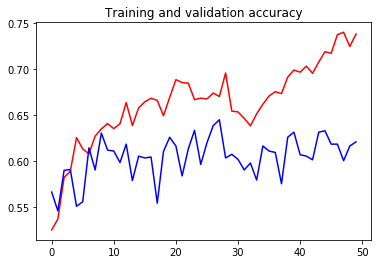

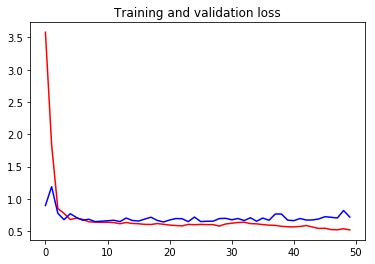

In [11]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy)) 
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')

Training accuracy gradually increased and validation accuracy fluctuated a lot but still in the range of 58 ~ 62%.

The validation loss almost plateaued after 4~5 epochs and training loss was almost constant and started to decreased slightly after 40 epochs.

### Try 2
Adding another 1 hidden layer with 1024 neurons

In [13]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (128, 128, 3)),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(1024, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               25166336  
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1025      
Total params: 25,692,673
Trainable params: 25,692,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit_generator(
            train_data,
            steps_per_epoch = 250,
            epochs = 50,
            verbose = 1,
            validation_data = test_data,
            validation_steps=63,
            callbacks = [callbacks])

Epoch 1/50
250/250 [==============================] - 106s 426ms/step - loss: 1.4338 - acc: 0.5179 - val_loss: 0.6745 - val_acc: 0.6040
Epoch 2/50
250/250 [==============================] - 105s 421ms/step - loss: 0.6864 - acc: 0.5450 - val_loss: 0.6808 - val_acc: 0.5040
Epoch 3/50
250/250 [==============================] - 99s 395ms/step - loss: 0.6850 - acc: 0.5409 - val_loss: 0.6911 - val_acc: 0.5095
Epoch 4/50
250/250 [==============================] - 107s 429ms/step - loss: 0.6928 - acc: 0.5181 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 5/50
250/250 [==============================] - 118s 471ms/step - loss: 0.6934 - acc: 0.4913 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 6/50
250/250 [==============================] - 106s 424ms/step - loss: 0.6932 - acc: 0.5026 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 7/50
250/250 [==============================] - 103s 414ms/step - loss: 0.6937 - acc: 0.5004 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 8/50
250/250 [=============================

Even with another layer of neurons the accuracy did not improve. After 8 epochs, the loss is constant.

### Try 3
Using Convolutional Neural Networks with one Conv and one Max Pooling layer

In [5]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 63504)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8128640   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 8,129,217
Trainable params: 8,129,217
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit_generator(
            train_data,
            steps_per_epoch = 250,
            epochs = 50,
            verbose = 1,
            validation_data = test_data,
            validation_steps=63,
            callbacks = [callbacks])

Epoch 1/50
250/250 [==============================] - 106s 424ms/step - loss: 0.7225 - acc: 0.6221 - val_loss: 0.6064 - val_acc: 0.6740
Epoch 2/50
250/250 [==============================] - 118s 470ms/step - loss: 0.5210 - acc: 0.7448 - val_loss: 0.6078 - val_acc: 0.6700
Epoch 3/50
250/250 [==============================] - 128s 514ms/step - loss: 0.4094 - acc: 0.8192 - val_loss: 0.5951 - val_acc: 0.6940
Epoch 4/50
250/250 [==============================] - 74s 296ms/step - loss: 0.2945 - acc: 0.8842 - val_loss: 0.6504 - val_acc: 0.6965
Epoch 5/50
250/250 [==============================] - 66s 263ms/step - loss: 0.1832 - acc: 0.9386 - val_loss: 0.7702 - val_acc: 0.6955
Epoch 6/50
250/250 [==============================] - 65s 260ms/step - loss: 0.1108 - acc: 0.9674 - val_loss: 0.8626 - val_acc: 0.6985
Epoch 7/50
249/250 [============================>.] - ETA: 0s - loss: 0.0592 - acc: 0.9873
Achieved an accuracy of 98%
250/250 [==============================] - 64s 257ms/step - loss: 0.

Using a Convolutional Neural Network an accuracy of 98% was achieved in 8 epochs (so much better than that of a regular Neural Network)

Even the Validation accuracy has reached 71% but this clearly indicates overfitting on the training set.

Text(0.5, 1.0, 'Training and validation loss')

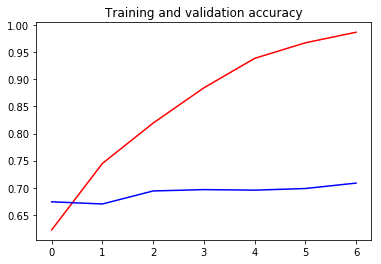

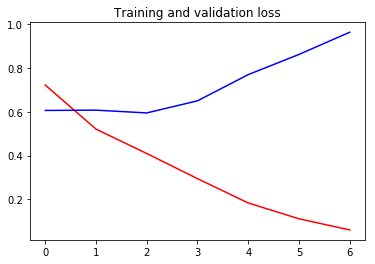

In [7]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy)) 
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')

The training accuracy keeps increasing (loss decreases) and the validation accuracy is almost constant after 2 epochs (but the validation loss increases)

### Try 4
Adding more convolutional layers and changing the neurons in the FCN layer. Adding more Pooling layers also reduces the image size by a significant amount.

Removing the callbacks

In [11]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)            

In [12]:
history = model.fit_generator(
            train_data,
            steps_per_epoch = 250,
            epochs = 50,
            verbose = 1,
            validation_data = test_data,
            validation_steps=63)

Epoch 1/50
250/250 [==============================] - 105s 422ms/step - loss: 0.6753 - acc: 0.5913 - val_loss: 0.6023 - val_acc: 0.6690
Epoch 2/50
250/250 [==============================] - 104s 416ms/step - loss: 0.5651 - acc: 0.7050 - val_loss: 0.5455 - val_acc: 0.7255
Epoch 3/50
250/250 [==============================] - 104s 416ms/step - loss: 0.4956 - acc: 0.7607 - val_loss: 0.5085 - val_acc: 0.7535
Epoch 4/50
250/250 [==============================] - 105s 419ms/step - loss: 0.4292 - acc: 0.7970 - val_loss: 0.4856 - val_acc: 0.7660
Epoch 5/50
250/250 [==============================] - 108s 432ms/step - loss: 0.3708 - acc: 0.8322 - val_loss: 0.4956 - val_acc: 0.7785
Epoch 6/50
250/250 [==============================] - 105s 418ms/step - loss: 0.2998 - acc: 0.8714 - val_loss: 0.5033 - val_acc: 0.7885
Epoch 7/50
250/250 [==============================] - 106s 425ms/step - loss: 0.2260 - acc: 0.8999 - val_loss: 0.5800 - val_acc: 0.7700
Epoch 8/50
250/250 [============================

Text(0.5, 1.0, 'Training and validation loss')

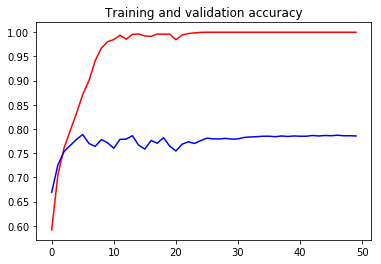

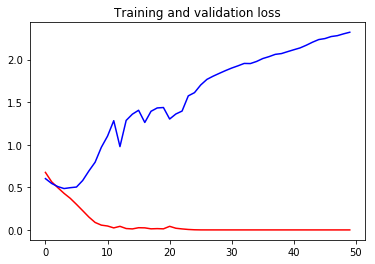

In [13]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy)) 
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')

After about 8 epochs, the training accuracy reached 98% but the validation accuracy plateaued at 77%. This is a clear sign of overfitting on the training set. 

Actually, the validation loss starts to increase after a certain point.

One way to avoid overfitting data is to get more data but if we don't have too much data we can use the ImageDataGenerator of keras to augment our data which uses different techniques like flipping, rotating, shearing etc to the images.

### Try 5
We can use the ImageDataGenerater to the earlier CNN and see if the validation accuracy improves

In [14]:
train_generator = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Creating a generator for training data. Target_size resizes every image into the specified size.
train_data = train_generator.flow_from_directory(
                '/home/srikar/dataset/training_set/',
                target_size = (128,128),
                batch_size = 32,
                class_mode = 'binary')

# Test data remains the same
test_genrator = ImageDataGenerator(rescale = 1/255)
# Creating a generator for training data.
test_data = test_genrator.flow_from_directory(
                '/home/srikar/dataset/test_set/',
                target_size = (128,128),
                batch_size = 32,
                class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [15]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 12544)            

In [16]:
history = model.fit_generator(
            train_data,
            steps_per_epoch = 250,
            epochs = 50,
            verbose = 1,
            validation_data = test_data,
            validation_steps=63,
            callbacks = [callbacks])

Epoch 1/50
250/250 [==============================] - 195s 779ms/step - loss: 0.7103 - acc: 0.5497 - val_loss: 0.6809 - val_acc: 0.5830
Epoch 2/50
250/250 [==============================] - 178s 714ms/step - loss: 0.6668 - acc: 0.5955 - val_loss: 0.6548 - val_acc: 0.6030
Epoch 3/50
250/250 [==============================] - 181s 722ms/step - loss: 0.6541 - acc: 0.6090 - val_loss: 0.6414 - val_acc: 0.6385
Epoch 4/50
250/250 [==============================] - 158s 632ms/step - loss: 0.6417 - acc: 0.6267 - val_loss: 0.6012 - val_acc: 0.6890
Epoch 5/50
250/250 [==============================] - 173s 693ms/step - loss: 0.6205 - acc: 0.6455 - val_loss: 0.6074 - val_acc: 0.6680
Epoch 6/50
250/250 [==============================] - 170s 681ms/step - loss: 0.6027 - acc: 0.6700 - val_loss: 0.5700 - val_acc: 0.7150
Epoch 7/50
250/250 [==============================] - 178s 713ms/step - loss: 0.5968 - acc: 0.6862 - val_loss: 0.5388 - val_acc: 0.7445
Epoch 8/50
250/250 [============================

W0711 15:36:25.259484 140543325484800 callbacks.py:257] Method (on_train_batch_end) is slow compared to the batch update (0.473748). Check your callbacks.


250/250 [==============================] - 452s 2s/step - loss: 0.5758 - acc: 0.7013 - val_loss: 0.5175 - val_acc: 0.7535
Epoch 11/50
250/250 [==============================] - 137s 547ms/step - loss: 0.5672 - acc: 0.7109 - val_loss: 0.5487 - val_acc: 0.7115
Epoch 12/50
250/250 [==============================] - 136s 543ms/step - loss: 0.5521 - acc: 0.7234 - val_loss: 0.5083 - val_acc: 0.7650
Epoch 13/50
250/250 [==============================] - 122s 486ms/step - loss: 0.5543 - acc: 0.7170 - val_loss: 0.5005 - val_acc: 0.7615
Epoch 14/50
250/250 [==============================] - 120s 481ms/step - loss: 0.5400 - acc: 0.7219 - val_loss: 0.5189 - val_acc: 0.7495
Epoch 15/50
250/250 [==============================] - 122s 489ms/step - loss: 0.5423 - acc: 0.7270 - val_loss: 0.4690 - val_acc: 0.7830
Epoch 16/50
250/250 [==============================] - 121s 485ms/step - loss: 0.5443 - acc: 0.7280 - val_loss: 0.4900 - val_acc: 0.7630
Epoch 17/50
250/250 [==============================] - 1

In [17]:
histories = []
histories.append(history)

In [18]:
histories

Text(0.5, 1.0, 'Training and validation loss')

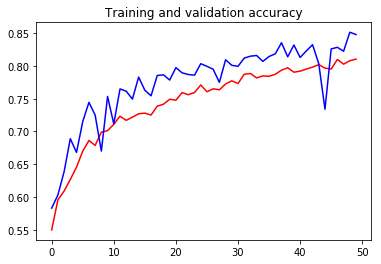

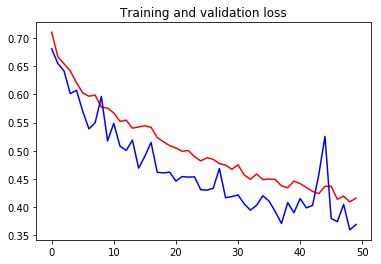

In [20]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy)) 
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')

Both the training and validation accuracy keep increasing with the number of epochs and the losses also keep decreasing. If we run for more epochs the loss might decrease even further.

The data augmentation is a useful technique for improving the accuracy. If the validation set is not very different from the train set then data augmentation might actually give worse accuracy on the validation set as it won't encounter any such type of processed images.